In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pyodbc
import sqlite3

In [15]:
# Connect to SQL Server
DB = {'servername': 'LAPTOP-HSI9FLRD\\SQLEXPRESS',
      'database': 'DataWarehouseGreatOutdoors'}

export_conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + DB['servername'] +
                             ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')

export_cursor = export_conn.cursor()

In [21]:
orders = pd.read_sql_query('SELECT * FROM order_details', export_conn)
orders

C:\Users\chris\AppData\Local\Temp\ipykernel_43720\2125999458.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql_query('SELECT * FROM order_details', export_conn)


,Order_details_sk,Order_details_time_stamp,Order_detail_code,Order_number,Order_method_code,Order_method_en,Quantity,Return_quantity,Order_detail_unit_cost,Order_detail_unit_price,Order_detail_unit_sale,Order_detail_order_date,Order_detail_product_number,Retailer_site_code,Sales_staff_code,product_sk,retailer_sk,sales_staff_sk
0,1,2024-03-17 16:06:12.910,47747,1153,7,Sales visit,100.0,None,9.64,12.53,11.81,2020-04-14 00:00:00.0000000,2,4,50,28,315.0,54
1,2,2024-03-17 16:06:12.917,47994,1153,7,Sales visit,254.0,None,18.25,27.37,25.1,2020-04-14 00:00:00.0000000,32,4,50,42,315.0,54
2,3,2024-03-17 16:06:12.917,48015,1153,7,Sales visit,114.0,None,19.67,26.54,24.82,2020-04-14 00:00:00.0000000,35,4,50,45,315.0,54
3,4,2024-03-17 16:06:12.920,48022,1153,7,Sales visit,130.0,None,21.03,34.9,31.44,2020-04-14 00:00:00.0000000,36,4,50,46,315.0,54
4,5,2024-03-17 16:06:12.920,48049,1153,7,Sales visit,74.0,None,42.33,67.73,61.38,2020-04-14 00:00:00.0000000,39,4,50,49,315.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,43059,2024-03-17 16:06:24.733,110788,9479,5,Web,64.0,None,19,38,33.25,2022-02-02 00:00:00.0000000,52,338,27,64,180.0,41
43059,43060,2024-03-17 16:06:24.733,110816,9479,5,Web,24.0,None,9,18,15.75,2022-02-02 00:00:00.0000000,56,338,27,68,180.0,41
43060,43061,2024-03-17 16:06:24.733,110827,9479,5,Web,40.0,None,40,80,70,2022-02-02 00:00:00.0000000,57,338,27,69,180.0,41
43061,43062,2024-03-17 16:06:24.733,110914,9479,5,Web,32.0,None,79.19,99,94.05,2022-02-02 00:00:00.0000000,78,338,27,92,180.0,41


In [41]:
orders = orders.loc[ :, ['Order_details_sk', 'Order_number', 'Order_method_code', 'Quantity', 'Order_detail_unit_cost', 'Order_detail_unit_price', 'Order_detail_product_number', 'Retailer_site_code']]
orders

,Order_details_sk,Order_number,Order_method_code,Quantity,Order_detail_unit_cost,Order_detail_unit_price,Order_detail_product_number,Retailer_site_code
0,1,1153,7,100.0,9.64,12.53,2,4
1,2,1153,7,254.0,18.25,27.37,32,4
2,3,1153,7,114.0,19.67,26.54,35,4
3,4,1153,7,130.0,21.03,34.9,36,4
4,5,1153,7,74.0,42.33,67.73,39,4
...,...,...,...,...,...,...,...,...
43058,43059,9479,5,64.0,19,38,52,338
43059,43060,9479,5,24.0,9,18,56,338
43060,43061,9479,5,40.0,40,80,57,338
43061,43062,9479,5,32.0,79.19,99,78,338


In [40]:
x = orders.drop('Quantity', axis=1)
y = orders.loc[:, ['Quantity']]
y

,Quantity
0,100.0
1,254.0
2,114.0
3,130.0
4,74.0
...,...
43058,64.0
43059,24.0
43060,40.0
43061,32.0


In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.15, ## 15% of the data will be used for testing
    random_state = 48
)


In [27]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(x_train, y_train)
reg_model

LinearRegression()

In [29]:
y_pred = reg_model.predict(x_test)
y_pred

array([[53.66493947],
       [49.02803435],
       [62.51181979],
       ...,
       [87.79593482],
       [58.08352954],
       [ 2.68345916]])

In [34]:
prediction_orders = pd.DataFrame(y_pred)
prediction_orders = prediction_orders.rename(columns={0: 'Predicted_Quantity'})
prediction_orders

,Predicted_Quantity
0,53.664939
1,49.028034
2,62.511820
3,44.201517
4,42.444789
...,...
6455,50.799837
6456,48.515915
6457,87.795935
6458,58.083530


In [35]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['Quantity'], prediction_orders], axis=1)
y_test_prediction_merge.loc[y_test_prediction_merge['Quantity'].notna(), :]

,Quantity,Predicted_Quantity
0,150.0,53.664939
1,78.0,49.028034
2,142.0,62.511820
3,18.0,44.201517
4,38.0,42.444789
...,...,...
6455,26.0,50.799837
6456,64.0,48.515915
6457,166.0,87.795935
6458,36.0,58.083530


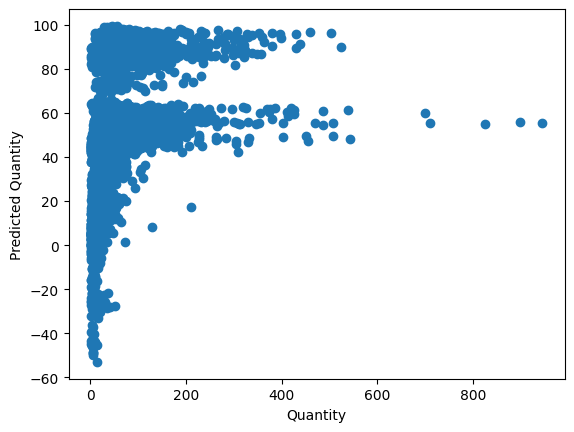

In [48]:
plt.scatter(y_test_prediction_merge['Quantity'], y_test_prediction_merge['Predicted_Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Predicted Quantity')
plt.show()

In [46]:
mean_squared_error(y_test_prediction_merge['Quantity'], y_test_prediction_merge['Predicted_Quantity'])

3061.67911851388

In [47]:
mean_absolute_error(y_test_prediction_merge['Quantity'], y_test_prediction_merge['Predicted_Quantity'])

32.0347746250317